In [ ]:
import numpy as np
import pandas as pd       
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [9]:
import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv')   
display(big_mart_data)


big_mart_data.head()

big_mart_data.shape

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


(8523, 12)

In [12]:
#getting some info about the dataset

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
""" categorical values
-item-identifier
-item_Fat_Content
-item_Type
-Outlet-Size
-Outlet-identifier
-Outlet_Location_Type
-Outlet_Type

"""

In [13]:
#checking for missing values

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values using imputation method

Mean --> average value
Mode --> most repeated value

 Converting the missing values in the numerical column using mean 
 AND
 Converting the missing values in the categorical column using mode
 

In [ ]:
#mean value of "Item_Weight_column"

big_mart_data['Item_Weight'].mean()   #mean value of product weight 

np.float64(12.857645184135976)

In [19]:
#filling the missing values in"item-weight" column with "Mean" value

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)


# fillna --> filling the missing values where na is not available ie, missing values 

In [20]:
#checking for missing values

big_mart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Replacing the missing values 'Outlet-Size' with mode
import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 

mode_of_outlet_size = big_mart_data.pivot_table(values ="Outlet_Size",
                                                columns ="Outlet_Type",
                                                aggfunc=lambda x: x.mode()[0])

print(mode_of_outlet_size)



Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [2]:
import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 

missing_values= big_mart_data['Outlet_Size'].isnull()

print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 
mode_of_outlet_size= big_mart_data['Outlet_Size'].mode()[0]

big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size)

#checking for missing values

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data Analysis
***

In [14]:
#describe function give us the statical measures about the data

big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Feature

C:\Users\chava\AppData\Local\Temp\ipykernel_21184\1118754272.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


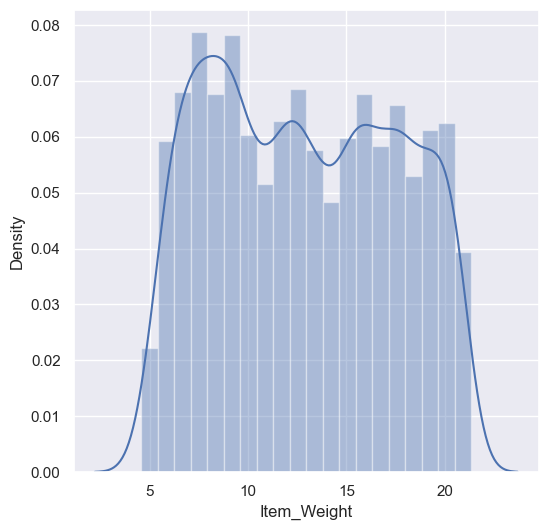

In [ ]:
import seaborn as sns
import numpy as np      
import matplotlib.pyplot as plt

sns.set()

#Item_Weight distribution
plt.figure(figsize = (6,6))
sns.histplot(big_mart_data['Item_Weight'])

plt.show()



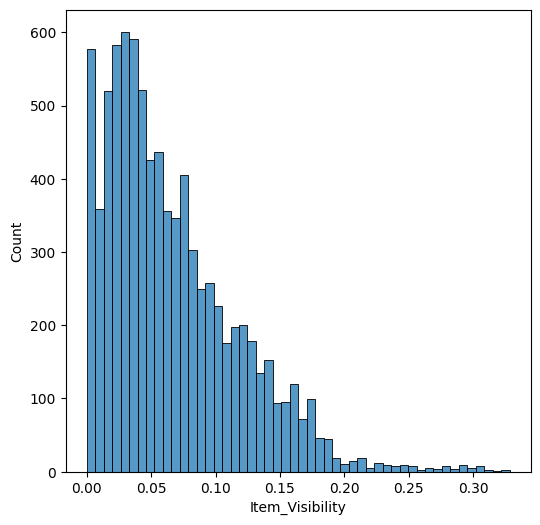

In [2]:
import seaborn as sns
import numpy as np      
import matplotlib.pyplot as plt



#Item_Visibility distribution
plt.figure(figsize = (6,6))
sns.histplot(big_mart_data['Item_Visibility'])

plt.show()

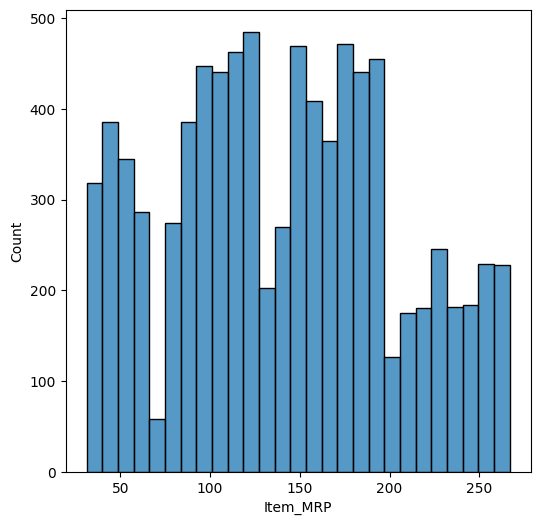

In [3]:
import seaborn as sns
import numpy as np      
import matplotlib.pyplot as plt



#Item_MRP distribution
plt.figure(figsize = (6,6))
sns.histplot(big_mart_data['Item_MRP'])

plt.show()

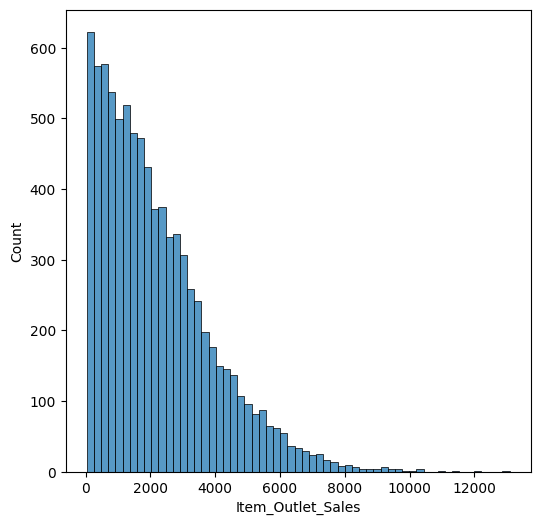

In [4]:
import seaborn as sns
import numpy as np      
import matplotlib.pyplot as plt



#Item_Outlet_Sales distribution
plt.figure(figsize = (6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'])

plt.show()

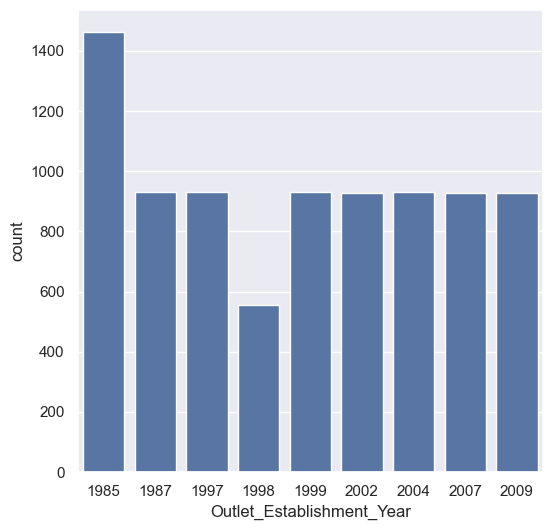

In [ ]:
import seaborn as sns
import numpy as np      
import matplotlib.pyplot as plt



#Outlet_Establishment_Year column 
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)

plt.show()

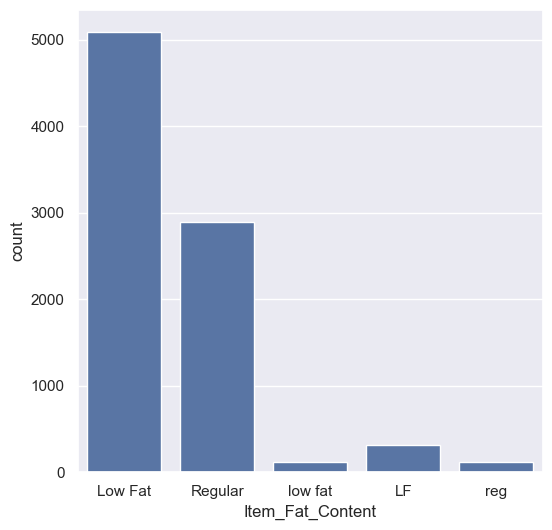

In [47]:
#Item_Fat_Content column

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

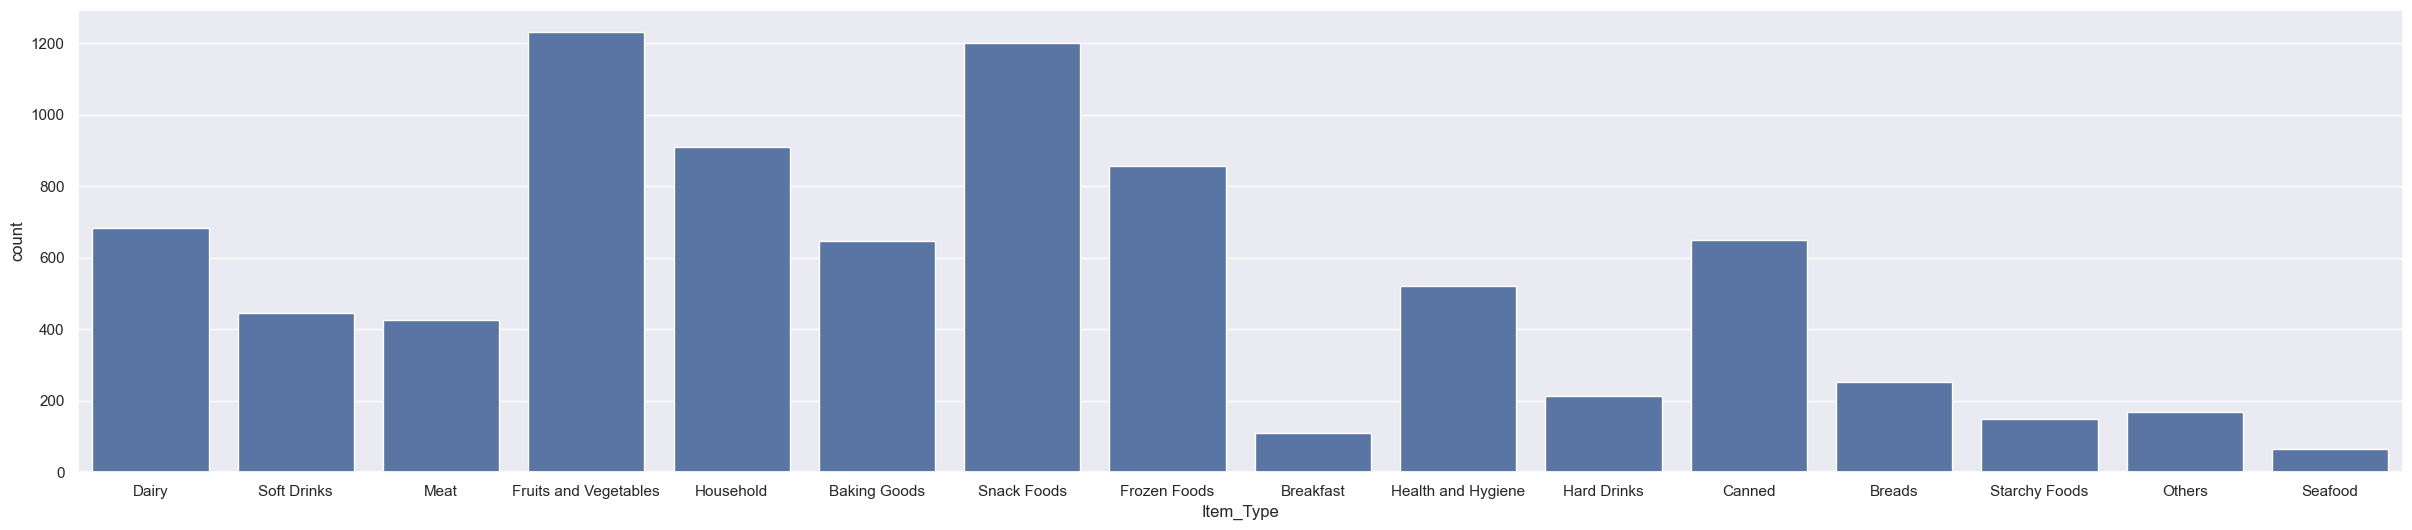

In [ ]:
#Item_Type column

plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

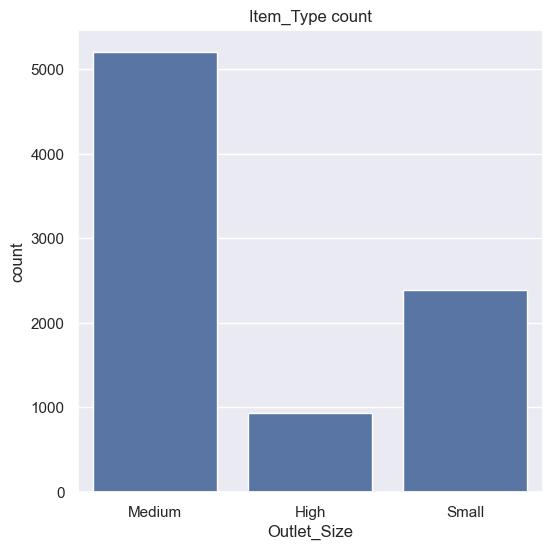

In [52]:
#Outlet_Size column

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title('Item_Type count')
plt.show()

Data Pre-Processing


In [53]:
big_mart_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [61]:
big_mart_data.replace({'Item_Fat_Content':
                {'Low fat':'Low Fat',
                         'LF':'Low Fat',
                         'reg':'Regular'}},inplace=True)
big_mart_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5405
Regular    3006
low fat     112
Name: count, dtype: int64

In [64]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Lable Encoding

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in columns_to_encode:
    big_mart_data[col] = encoder.fit_transform(big_mart_data[col])  # Corrected line

print(big_mart_data.head())


   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 1         0.016047          4   
1                8         5.92                 2         0.019278         14   
2              662        17.50                 1         0.016760         10   
3             1121        19.20                 2         0.000000          6   
4             1297         8.93                 1         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            3   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0         

Splitting features and Target

In [ ]:

import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 

x=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
y=big_mart_data['Item_Outlet_Sales']

print(x)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

: 

In [9]:

import pandas as pd

big_mart_data = pd.read_csv(r'C:\\Users\\chava\\Downloads\\archive\\Sales Project\\Train.csv') 

x=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
y=big_mart_data['Item_Outlet_Sales']

print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data and Testing data

In [ ]:
x